# Previsão com Médias Móveis
Prof. Fernando Amaral

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from datetime import datetime

In [6]:
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('../../Dados/AirPassengers.csv', parse_dates=['Month'], index_col='Month', date_parser=dateparse)

C:\Users\lucas.souza\AppData\Local\Temp\ipykernel_20120\1947005139.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv('../../Dados/AirPassengers.csv', parse_dates=['Month'], index_col='Month', date_parser=dateparse)


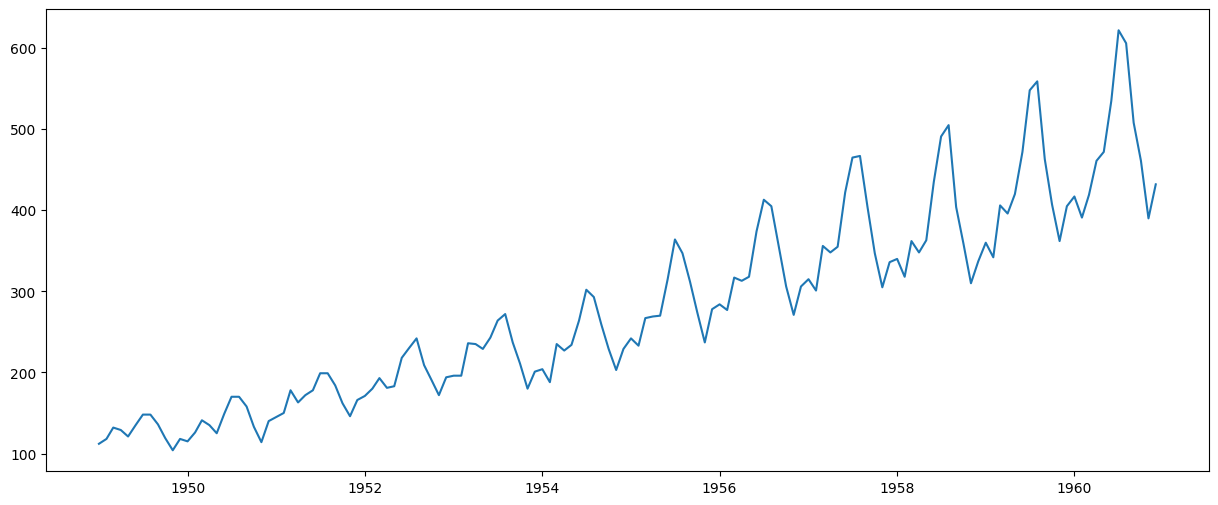

In [7]:
plt.plot(data)
plt.show()

In [8]:
#melhor configuração
optimal_n = None
#melhor mse
best_mse = None

db = data[['#Passengers']].values.astype('float32')


mean_results_for_all_possible_n_values = np.zeros(int(len(db) / 2 - 2))

#tentando de 3 até metade mais 1
for n in range(3, int(len(db) / 2 + 1)):
    mean_for_n = np.zeros(len(db) - n) 
    for i in range(0, len(db) - n):
        mean_for_n[i] = np.power(np.mean(db[:, 0][i:i+n]) - db[i + n][0], 2)
    mean_results_for_all_possible_n_values[n - 3] = np.mean(mean_for_n)

optimal_n = np.argmin(mean_results_for_all_possible_n_values) + 3
best_mse = np.min(mean_results_for_all_possible_n_values)

print("MSE = %s" % mean_results_for_all_possible_n_values)
print("Melhor MSE = %s" % best_mse)
print("Otimo n = %s" % optimal_n)

MSE = [ 2339.63355773  2764.88660714  3012.1012801   3151.45469986
  3227.18633481  3256.56100643  3186.66146604  3011.60183583
  2743.00650623  2472.34090353  2354.71362097  2403.15665464
  2555.64628785  2755.90582275  2957.73325787  3148.95680077
  3318.74201781  3471.20651226  3579.85737664  3632.13833357
  3621.28445381  3590.00383396  3614.46070989  3714.23055834
  3856.30384392  4039.07640452  4228.22950309  4417.98334369
  4590.62768394  4759.1164638   4915.9754521   5048.6370582
  5147.82096395  5226.01904015  5334.33178793  5486.37156963
  5665.83581871  5879.92290478  6108.05807897  6311.94559753
  6507.04782949  6685.18395128  6897.90876226  7105.0674209
  7299.11087822  7470.66003289  7664.68186664  7894.86749526
  8104.34274035  8337.10502537  8595.05624746  8844.55095184
  9063.9041806   9272.33340756  9544.4010417   9837.04024727
 10135.60328353 10420.20540762 10725.07177562 11069.94455413
 11393.32523657 11748.71707153 12111.18047149 12433.46474889
 12664.11743576 1293

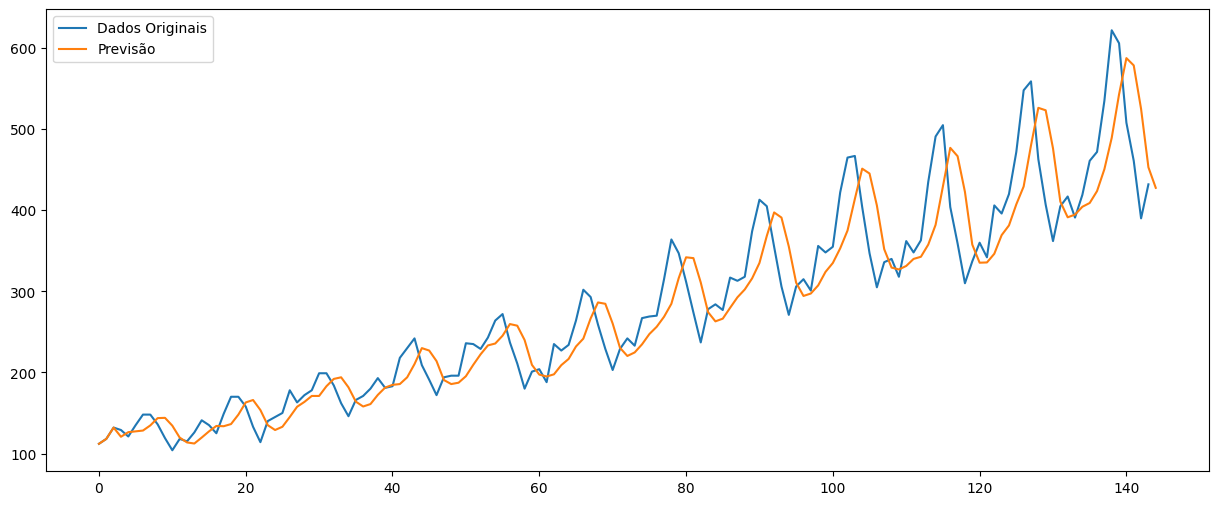

In [9]:
forecast = np.zeros(len(db) + 1) 
for i in range(0, optimal_n):
    forecast[i] = db[i][0]
for i in range(0, len(db) - optimal_n + 1):
        forecast[i+optimal_n] = np.mean(db[:, 0][i:i+optimal_n])

plt.plot(db[:, 0],label = 'Dados Originais')
plt.plot(forecast, label = 'Previsão')
plt.legend()
plt.show()